<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Build_scatter_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>BÀI TẬP COLAB SỐ 03 - 17/05/2021</b></h1>
<h1 align="center"><b>PREDICT FINAL SCORE OF IT001</b></h1>

###LỚP: CS114.L22.KHCL
###NHÓM:
1. Đỗ Trọng Khánh - *19521676*
2. Võ Phạm Duy Đức - *19521383*
3. Trịnh Công Danh - *19521326*

In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_wecode = pd.read_csv('/content/drive/My Drive/21-5-2021/wecode.csv')
data_score_training = pd.read_csv('/content/drive/My Drive/21-5-2021/score_training.csv')
data_wecode.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [4]:
data_score_training.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


#Xử lý wecode.csv


In [7]:
new_wecode = pd.DataFrame(data_wecode['user_id'])
new_wecode['Sum_Problems'] = pd.DataFrame(data_wecode['is_final'])
new_wecode.insert(2,'Sum_Submits', 1)
new_wecode['Sum_Correct_Submits'] = pd.DataFrame(map(int, (data_wecode['pre_score'] == 10000)))
new_wecode['Sum_Correct_Problems'] = pd.DataFrame(map(int, (data_wecode['pre_score'] == 10000) & (data_wecode['is_final'] == 1)))
new_wecode.columns = ['id', 'Sum_Problems', 'Sum_Correct_Submits', 'Sum_Submits', 'Sum_Correct_Problems']
new_wecode = new_wecode.groupby(['id']).sum()
new_wecode

,Sum_Problems,Sum_Correct_Submits,Sum_Submits,Sum_Correct_Problems
id,,,,
1,2,2,1,1
4,38,54,44,37
5,5,6,3,3
6,88,130,89,85
7,2,5,0,0
...,...,...,...,...
1860,48,76,29,28
1862,6,12,4,4
1864,63,187,30,28


#Xử lý score.csv

In [8]:
score = data_score_training[["id", "CK"]]
score

,id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


#Nối 2 bảng

In [9]:
merge = pd.merge(new_wecode,score, on = 'id')
merge = merge.dropna()
merge

,id,Sum_Problems,Sum_Correct_Submits,Sum_Submits,Sum_Correct_Problems,CK
0,24,77,164,80,72,9.5
1,27,5,13,4,3,10
2,29,80,199,75,72,8.5
3,34,84,218,81,81,6.5
4,35,151,297,152,145,4.5
...,...,...,...,...,...,...
848,1856,31,64,23,23,7.5
849,1857,40,55,37,37,4
850,1859,30,31,3,3,1.5
851,1862,6,12,4,4,7.5


In [17]:
data_plot = merge.copy()
data_plot = data_plot.sort_values(by='CK')
data_plot.head()

,id,Sum_Problems,Sum_Correct_Submits,Sum_Submits,Sum_Correct_Problems,CK
394,823,48,109,46,46,0
60,161,44,68,41,41,0
63,166,28,32,22,21,0
736,1529,18,41,15,15,0
87,222,28,65,23,23,0


#Biểu đồ mối liên hệ giữa các thông số có thể tính được đến điểm cuối kỳ

In [11]:
import matplotlib.pyplot as plt

#1. Tổng số problem đã solve(is_final == 1 and pre_score = 10000)/ Tổng số problem đã submit

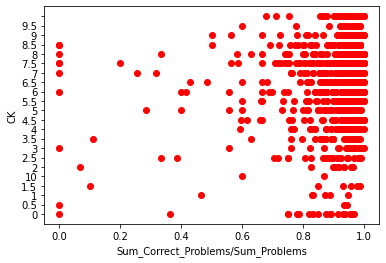

In [12]:
data_1 = data_plot["Sum_Correct_Problems"]/ data_plot["Sum_Problems"]
plt.scatter(data_1, data_plot["CK"], c = 'red')
plt.xlabel("Sum_Correct_Problems/Sum_Problems")
plt.ylabel("CK")
plt.show()

#2.Tổng số problem đã submit/ Tổng số submissions

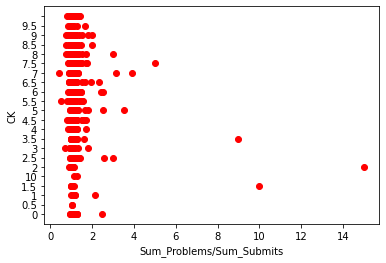

In [13]:
data_2 = data_plot["Sum_Problems"] / data_plot["Sum_Submits"]
plt.scatter(data_2, data_plot["CK"], c = 'red')
plt.xlabel("Sum_Problems/Sum_Submits")
plt.ylabel("CK")
plt.show()

#3. Số lần submit đúng(pre_score = 10000) / Tổng số submissions

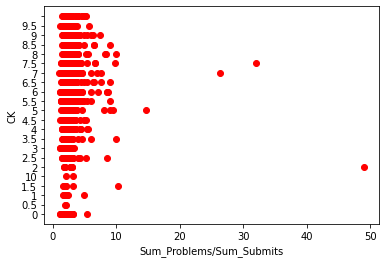

In [14]:
data_2 = data_plot["Sum_Correct_Submits"] / data_plot["Sum_Submits"]
plt.scatter(data_2, data_plot["CK"], c = 'red')
plt.xlabel("Sum_Problems/Sum_Submits")
plt.ylabel("CK")
plt.show()